In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [5]:
def draw_means(X_distribution, n):
    X_samples = X_distribution.rvs(size=n) # n = size of the sample mean
    return np.mean(X_samples)

def plot_histrogram(X_distribution, n, m):
    sample_means = np.empty(m)
    # computing m sample means
    for j in range(m):
        sample_means[j] = draw_means(X_distribution,n)

    fig, ax = plt.subplots()
    ax.hist(sample_means, bins=30)
    μ = X_distribution.mean()
    σ = X_distribution.std()

    # plot a vertical line to visually see how close the histogram is to the mean
    ax.axvline(x=μ, linestyle = "--", label = fr"$\mu = {μ}$", color = "red")
    ax.set_xlim(μ - σ, μ + σ)
    ax.set_xlabel(r"$\bar X_n$")
    ax.set_ylabel("Density")
    ax.legend()
    plt.show()

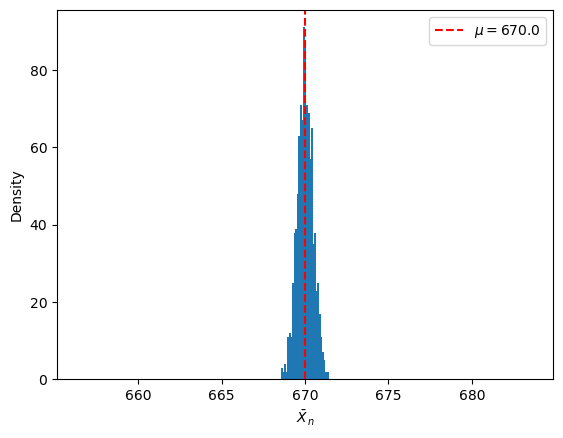

In [6]:
X_distribution = st.binom(n = 1000, p = 0.67)
plot_histrogram(X_distribution, n = 1000, m = 1000)

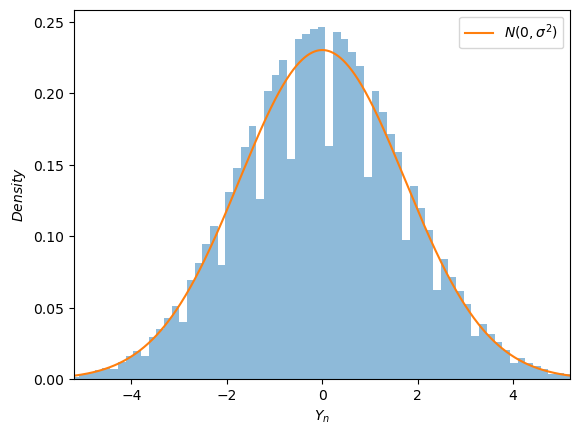

In [17]:
n = 300 # number of observations in each sample
k = 1_000_000 # number of samples

distribution = st.poisson(3)
μ, σ = distribution.mean(), distribution.std()

# 2D array of k samples of size n
data = distribution.rvs((k,n)) 
# find the mean of each sample (i.e. each row => axis = 1)
sample_means = data.mean(axis=1)
Y = np.sqrt(n) * (sample_means - μ) # to get mean = 0 and std = sigma instead of sigma/sqrt(n)

fig, ax = plt.subplots()
xmin, xmax = -3 * σ, 3 * σ
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins = 100, alpha = 0.5, density = True) # density = True normalizes the histogram
xgrid = np.linspace(xmin,xmax,1000)
ax.plot(xgrid, st.norm.pdf(xgrid, scale = σ), label = r"$N(0,\sigma^2)$")
ax.set_xlabel(r"$Y_n$")
ax.set_ylabel(r"$Density$")
ax.legend()
plt.show()

Exercise 20.1 and 20.2 are too simple, so I'm doing 20.3 directly

# Exercise 20.3
We mentioned above that LLN can still hold sometimes even with IID is violated.

Let's investigate this claim further.

Consider the AR(1) process$$X_{t+1}=\alpha+ \beta X_{t}+\sigma \epsilon_{t+1}$$
where $\alpha, \beta, \sigma$ are constants and $\epsilon_{1}, \epsilon_{2},\dots$ are IID and standard normal. Suppose that $$X_{0} \sim N\left( \dfrac{\alpha}{1-\beta}, \dfrac{\sigma^{2}}{1-\beta^{2}} \right)$$
This process violates the independence assumption of the LLN since $X_{t+1}$ depends on the value of $X_{t}$. However, LLN type convergence of the sample mean to the population mean still occurs.

1. Prove that the sequence $X_{1},X_{2},\dots$ is identically distributed.
2. Show that LLN convergence holds using simulations with $\alpha=0.8$ and $\beta=0.2$

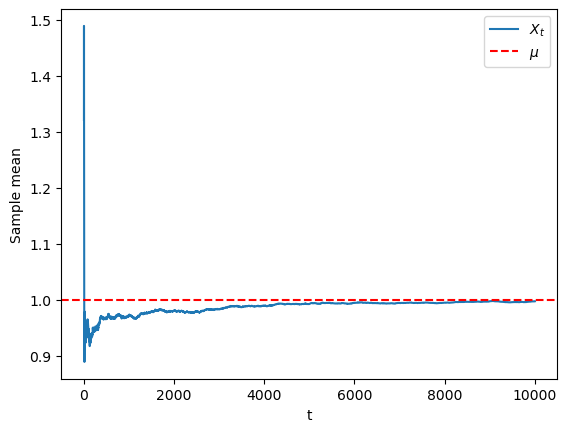

In [ ]:
# proof of question 1 is straighforward by induction

t = 10000 # length of the AR(1) process
X_t = np.zeros(t) # initialize the array for the process
ε = np.random.randn(t) # the array of noise
α, β = 0.8, 0.2 # given
σ = 0.3

μ, v = α/(1-β), σ**2/(1-β**2) # we use v for variance cause sigma is taken as a constant already
X_t[0] = np.random.normal(loc = μ, scale = np.sqrt(v))
for i in range(1,t):
    X_t[i] = α + β * X_t[i-1] + σ * ε[i]

sample_mean = np.cumsum(X_t)/np.arange(1,t+1) # vectorized operation to calculate sample mean

fig, ax = plt.subplots()
xgrid = np.linspace(0, t, t) # keeps the dimensionality the same
ax.plot(xgrid, sample_mean, label = r"$X_t$")
ax.axhline(μ, linestyle = "--", color = "red", label = fr"$\mu$")
ax.set_xlabel("t")
ax.set_ylabel(fr"Sample mean")
ax.legend()
plt.show()

# clearly, convergence holds in a LLN fashion despite the IID requirement being violated